# Đồ án: Lập Trình Phân Tích Dữ Liệu
----
***Bộ dữ liệu: Doanh số bán hàng của cữa hàng AVA SPORT 2/6/2022 - 4/6/2022***

**Nhóm 3:**
1. Đặng Quốc Toàn - 20051051
2. Thạch Thị Thanh Thảo - 20101981
3. Phạm Chánh Trực - 20122431
4. Phạm Tiến Thành - 20048721
5. Nguyễn Tòng - 20077921
----

# 1) Thuyết minh dữ liệu
---

**Giới thiệu về dữ liệu:**

-	Nguồn dữ liệu từ đâu: Số bán ngày 02/06/2022 - 04/06/2022 của AVA SPORT thuộc tập đoàn Mobile World Investment Corporation (MWG)
-	Ai là người thu thập dữ liệu: Thảo thu thập từ công ty MWG
-	Thời gian thu nhập là lúc nào: 20/11/2022
-	Tại sao thu nhập: vì bộ data trên là số lượng bán tăng giảm của một doanh nghiệp, từ đó chúng ta có cái nhìn sâu hơn về dữ liệu trong doanh nghiệp 


**Thông tin các thuộc tính của dữ liệu:**

*1. Mã đơn hàng:* Mỗi đơn hàng là một mã số khác nhau (tránh trùng lặp thông tin khách hàng)

*2. Hình thức xuất:*
-	Xuất bán hàng Online qua Shopee (bán hàng qua Shopee)
-	Xuất bán hàng Online tại siêu thị (đặt hàng online nhận tại siêu thị)
-	Xuất bán hàng Online tiết kiệm (mua online giảm giá, giá thấp hơn khi mua tại siêu thị)
-	Xuất bán hàng tại siêu thị 
-	Xuất bán hàng trả góp tại siệu thị
-	Xuất bán Online Only tại siêu thị (đặt hàng online đối với sản phẩm chỉ bán online nhận hàng tại siêu thị)
-	Xuất bán ưu đãi cho nhân viên (nhân viên của siêu thị sẽ nhận được ưu đãi giảm giá tùy thuộc vào thời gian làm việc)
-	Xuất đổi bảo hành tại siêu thị
*3. Ngày tạo: thời gian đặt hàng*

*4. Tên khách hàng*

*5. Phải thu:* tổng sổ tiền của sản phẩm (bao gồm cả phí giao hàng, VAT)

*6. Đã thu:* Khách hàng trả trước hoặc cọc

*7. Còn nợ:*

-	Khách hàng thanh toán toàn bộ số tiền: 0 
-	Khách hàng đặt cọc hoặc trả trước: phải thu - đã thu = còn nợ
-	Khách hàng chưa thanh toán: còn nợ = phải thu 

*8. Trạng thái:* đã xuất, chưa xuất

*9. Trạng thái giao hàng:* đã giao, chưa giao

*10. Trạng thái hủy:* đã hủy, chưa hủy

*11. Hình thức thanh toán*

*12. Hình thức giao hàng*

*13. Khoảng cách giao hàng *

*14. Tạo từ hệ thống: CRM, POS, ERP*

*15. Thời gian hẹn giao: thời gian sẽ giao hàng cho khách hàng*

*16. Ngày xuất hàng: thời gian sản phẩm xuất hàng (dự kiến từ hệ thống)*

*17. Mã siêu thị xuất hàng: mã siêu thị đang tồn sản phẩm*

*18. Siêu thị xuất:* Siêu thị xuất hàng 

*19. Mã sản phẩm*

*20. Tên sản phẩm*

*21. Số lượng*

*22. Giá bán*

*23. CTKM_1:* chương trình khuyến mãi 

*24. Nhóm hàng*

*25. Nhà sản xuất*

*26. Trạng thái hồ sơ*

*27. Thời gian thu tiền*

*28. Tình trạng nhập trả của sản phẩm đổi với sản phẩm chính*

*29. STT_1*


*30. Ngày*

*31. Onlineline/Cửa Hàng*

*32. Tỉnh*

*33. Nguồn Đặt Hàng*

*34. Giá gốc*


# 2) Những vấn đề mà nhóm muốn tìm hiểu trên bộ dữ liệu này
---

1.	Người tiêu dùng thường sẽ mua hàng (giày, dép) qua hình thức nào?
2.	Hãng (nhà sản xuất) được ưa chuộng nhất?
3.	Nhóm hàng được bán ra nhiều nhất?
4.	Sự phân phối của hình thức giao hàng?
5.	Sự tương quan giữa giá gốc và giá bán?
6.	Doanh thu theo khu vực (tỉnh)?
7.	Phân tích độ ưa chuộng hãng giày/dép theo thành phố?
8.	Top 10 sản phẩm được chạy nhất hệ thống?
9. Cho biết Doanh Thu của cữa hàng theo từng ngày dựa vào nhóm hàng đã được bán ra?
10.	Siêu thị có doanh thu cao nhất theo ngày?


# 3) Các bước xử lý
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)

## 3.1) Read Data

In [2]:
df =  pd.read_excel(r'D:\Source Code\Project Môn Học\Lập Trình Phân Tích Dữ Liệu\02-04_06 Giày Dép.xlsx')

## 3.2) Data Overview

In [3]:
# in ra 3 rows đầu tiên
df.head(3)

Mã đơn hàng                     Hình thức xuất            Ngày tạo  \
0  00014SO22068748119  Xuất bán hàng Online tại siêu thị 2022-06-02 23:26:17   
1  10112SO22060011058         Xuất bán hàng tại siêu thị 2022-06-02 14:13:41   
2  10112SO22060011058         Xuất bán hàng tại siêu thị 2022-06-02 14:13:41   

   Tên khách hàng  Phải thu   Đã thu  Còn nợ Trạng thái xuất  \
0  Dương Nhựt Tân    796000   796000       0         Đã xuất   
1  Nguyễn Văn Hòa   2878000  2878000       0         Đã xuất   
2  Nguyễn Văn Hòa   2878000  2878000       0         Đã xuất   

  Trạng thái giao hàng Trạng thái hủy  ... Nhà sản xuất Trạng thái hồ sơ  \
0              Đã giao       Chưa hủy  ...       Reebok          1 - Mới   
1              Đã giao       Chưa hủy  ...         Nike          1 - Mới   
2              Đã giao       Chưa hủy  ...       ADIDAS          1 - Mới   

       Thời gian thu tiền  \
0 2022-06-05 11:17:25.253   
1 2022-06-02 14:14:03.805   
2 2022-06-02 14:14:03.805   

  Tình trạng nhập trả của sản phẩm đổi với sản phẩm chính STT_1 Ngày  \
0                                           Chưa trả          1    2   
1                                           Chưa trả          2    2   
2                                           Chưa trả          3    2   

   Onlineline/Cửa Hàng         Tỉnh  Nguồn Đặt Hàng  Giá gốc  
0               Online  Ho Chi Minh   Nhân Viên Tạo   796000  
1             Cửa Hàng  Ho Chi Minh   Nhân Viên Tạo  1903000  
2             Cửa Hàng  Ho Chi Minh   Nhân Viên Tạo   975000  

[3 rows x 34 columns]

In [4]:
# in ra 3 rows cuối cùng
df.tail(5)

Mã đơn hàng              Hình thức xuất            Ngày tạo  \
936  10531SO22060000472  Xuất bán hàng tại siêu thị 2022-06-04 20:18:07   
937  10531SO22060000472  Xuất bán hàng tại siêu thị 2022-06-04 20:18:07   
938  10531SO22060000482  Xuất bán hàng tại siêu thị 2022-06-04 21:49:20   
939  10531SO22060000482  Xuất bán hàng tại siêu thị 2022-06-04 21:49:20   
940  11230SO22060001102  Xuất bán hàng tại siêu thị 2022-06-04 16:08:53   

                                     Tên khách hàng  Phải thu   Đã thu  \
936  CÔNG TY TNHH MỘT THÀNH VIÊN NHIỆT ĐIỆN THỦ ĐỨC   1984000  1984000   
937  CÔNG TY TNHH MỘT THÀNH VIÊN NHIỆT ĐIỆN THỦ ĐỨC   1984000  1984000   
938                                         Chị Yến   3262000  3262000   
939                                         Chị Yến   3262000  3262000   
940                                     LÊ TẤN NGỌC   3500000  3500000   

     Còn nợ Trạng thái xuất Trạng thái giao hàng Trạng thái hủy  ...  \
936       0         Đã xuất              Đã giao       Chưa hủy  ...   
937       0         Đã xuất              Đã giao       Chưa hủy  ...   
938       0         Đã xuất              Đã giao       Chưa hủy  ...   
939       0         Đã xuất              Đã giao       Chưa hủy  ...   
940       0         Đã xuất              Đã giao       Chưa hủy  ...   

    Nhà sản xuất Trạng thái hồ sơ      Thời gian thu tiền  \
936     SKECHERS          1 - Mới 2022-06-04 20:18:32.591   
937         Anta          1 - Mới 2022-06-04 20:18:32.591   
938         Puma          1 - Mới 2022-06-04 21:50:46.890   
939       Reebok          1 - Mới 2022-06-04 21:50:46.890   
940       ADIDAS          1 - Mới 2022-06-04 16:13:00.981   

    Tình trạng nhập trả của sản phẩm đổi với sản phẩm chính STT_1 Ngày  \
936                                           Chưa trả        388    4   
937                                           Chưa trả        389    4   
938                                           Chưa trả        390    4   
939                                           Chưa trả        391    4   
940                                           Chưa trả        392    4   

     Onlineline/Cửa Hàng         Tỉnh  Nguồn Đặt Hàng  Giá gốc  
936             Cửa Hàng  Ho Chi Minh   Nhân Viên Tạo  1345000  
937             Cửa Hàng  Ho Chi Minh   Nhân Viên Tạo   639000  
938             Cửa Hàng  Ho Chi Minh   Nhân Viên Tạo  1439000  
939             Cửa Hàng  Ho Chi Minh   Nhân Viên Tạo  1272000  
940             Cửa Hàng   Binh Phuoc   Nhân Viên Tạo  3500000  

[5 rows x 34 columns]

In [5]:
print(f"Dữ liêu có {df.shape[0]} rows, {df.shape[1]} columns")

Dữ liêu có 941 rows, 34 columns


In [6]:
# các columns trong datafrane
df.columns

Index(['Mã đơn hàng', 'Hình thức xuất', 'Ngày tạo', 'Tên khách hàng',
       'Phải thu', 'Đã thu', 'Còn nợ', 'Trạng thái xuất',
       'Trạng thái giao hàng', 'Trạng thái hủy', 'Hình thức thanh toán',
       'Hình thức giao hàng', 'Khoảng cách giao hàng', 'Tạo từ',
       'Thời gian hẹn giao', 'Ngày xuất hàng', 'Mã siêu thị xuất hàng',
       'Siêu thị xuất', 'Mã sản phẩm', 'Tên sản phẩm', 'Số lượng', 'Giá bán',
       'CTKM_1', 'Nhóm hàng', 'Nhà sản xuất', 'Trạng thái hồ sơ',
       'Thời gian thu tiền',
       'Tình trạng nhập trả của sản phẩm đổi với sản phẩm chính', 'STT_1',
       'Ngày', 'Onlineline/Cửa Hàng', 'Tỉnh', 'Nguồn Đặt Hàng', 'Giá gốc'],
      dtype='object')

In [7]:
# Tổng quan giá trị non-null(không null) và type của columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 34 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Mã đơn hàng                                              941 non-null    object        
 1   Hình thức xuất                                           941 non-null    object        
 2   Ngày tạo                                                 941 non-null    datetime64[ns]
 3   Tên khách hàng                                           941 non-null    object        
 4   Phải thu                                                 941 non-null    int64         
 5   Đã thu                                                   941 non-null    int64         
 6   Còn nợ                                                   941 non-null    int64         
 7   Trạng thái xuất                                      

In [8]:
#Statistical description (Mô tả thống kê của các biến số)
df.describe()

Phải thu        Đã thu        Còn nợ  Khoảng cách giao hàng  \
count  9.410000e+02  9.410000e+02  9.410000e+02             941.000000   
mean   1.949960e+06  1.287079e+06  6.628810e+05               2.698980   
std    2.264407e+06  1.288735e+06  2.274836e+06               5.953326   
min    2.950000e+05  0.000000e+00  0.000000e+00               0.000000   
25%    9.590000e+05  0.000000e+00  0.000000e+00               0.000000   
50%    1.314000e+06  1.094000e+06  0.000000e+00               0.000000   
75%    2.222000e+06  1.849000e+06  3.020000e+05               0.950000   
max    1.697300e+07  9.555000e+06  1.697300e+07              49.950001   

       Mã siêu thị xuất hàng   Mã sản phẩm    Số lượng       Giá bán  CTKM_1  \
count             941.000000  9.410000e+02  941.000000  9.410000e+02     0.0   
mean            10615.853348  1.414977e+12    1.013815  1.269100e+06     NaN   
std               696.419183  6.881783e+07    0.125564  6.639913e+05     NaN   
min              9764.000000  1.414964e+12    1.000000  2.950000e+05     NaN   
25%             10112.000000  1.414964e+12    1.000000  7.800000e+05     NaN   
50%             10145.000000  1.414965e+12    1.000000  1.134000e+06     NaN   
75%             11230.000000  1.414965e+12    1.000000  1.649000e+06     NaN   
max             11711.000000  1.415402e+12    3.000000  3.750000e+06     NaN   

            STT_1        Ngày       Giá gốc  
count  941.000000  941.000000  9.410000e+02  
mean   163.882040    3.166844  1.257371e+06  
std    101.087669    0.799472  6.594805e+05  
min      1.000000    2.000000  2.950000e+05  
25%     79.000000    3.000000  7.640000e+05  
50%    157.000000    3.000000  1.119000e+06  
75%    236.000000    4.000000  1.624000e+06  
max    392.000000    4.000000  3.750000e+06

## 3.3) Dropping irrelevant columns

In [9]:
# drop một số column không quan trọng
df = df.drop(['Ngày','Tình trạng nhập trả của sản phẩm đổi với sản phẩm chính','Khoảng cách giao hàng','Mã siêu thị xuất hàng','Còn nợ'], axis=1)

## 3.4) Xử Lý giá trị null và giá trị trùng lặp

In [10]:
# Kiểm tra Số lượng giá trị lặp trong rows
check = df.duplicated().value_counts()
print(check)
if check.index == False:
    print("---> Không có rows trùng nhau.")
# Hoặc là
print("*******************************")
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

False    941
dtype: int64
---> Không có rows trùng nhau.
*******************************
number of duplicate rows:  (0, 29)


In [11]:
# Thống kê số lượng null theo cột
print(df.isnull().sum())

Mã đơn hàng               0
Hình thức xuất            0
Ngày tạo                  0
Tên khách hàng            0
Phải thu                  0
Đã thu                    0
Trạng thái xuất           0
Trạng thái giao hàng      0
Trạng thái hủy            0
Hình thức thanh toán      0
Hình thức giao hàng       0
Tạo từ                    0
Thời gian hẹn giao        0
Ngày xuất hàng          228
Siêu thị xuất             0
Mã sản phẩm               0
Tên sản phẩm              0
Số lượng                  0
Giá bán                   0
CTKM_1                  941
Nhóm hàng                 0
Nhà sản xuất              0
Trạng thái hồ sơ          0
Thời gian thu tiền      126
STT_1                     0
Onlineline/Cửa Hàng       0
Tỉnh                      0
Nguồn Đặt Hàng            0
Giá gốc                   0
dtype: int64


In [12]:
#check Tỷ lệ % dữ liệu missing trên tổng số dữ liệu của cột
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(1)
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "--> Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.")
        return mis_val_table_ren_columns

#Check dữ liệu missing trong DataFrame: data_temp
missing_values(df)

File dữ liệu bao gồm có: 29 cột.
--> Có 3 cột chứa missing values.


Số giá trị Missing  Tỷ lệ % missing
CTKM_1                             941            100.0
Ngày xuất hàng                     228             24.2
Thời gian thu tiền                 126             13.4

In [13]:
# drop 1 số columns có giá trị null > 30% (như ta thấy đó là columns CTKM_1)
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: CTKM_1, 



In [14]:
# Đối với columns Ngày xuất hàng và thời gian thu tiền thì tỉ lệ % mising value không quá cao nên mình sẽ thay thể nó bằng str Unknown
value = 'Unknown'
df['Ngày xuất hàng'] = df['Ngày xuất hàng'].fillna(value=value)
df['Thời gian thu tiền'] = df['Thời gian thu tiền'].fillna(value=value)

In [15]:
# Kiểm tra lại xem còn giá trị nào null nữa không ?
missing_values(df)

File dữ liệu bao gồm có: 28 cột.
--> Có 0 cột chứa missing values.


Empty DataFrame
Columns: [Số giá trị Missing, Tỷ lệ % missing]
Index: []

## 3.5) Xử lý giá trị Outliers

In [16]:
# Xem phân phối chung của các biến số
df.describe()

Phải thu        Đã thu   Mã sản phẩm    Số lượng       Giá bán  \
count  9.410000e+02  9.410000e+02  9.410000e+02  941.000000  9.410000e+02   
mean   1.949960e+06  1.287079e+06  1.414977e+12    1.013815  1.269100e+06   
std    2.264407e+06  1.288735e+06  6.881783e+07    0.125564  6.639913e+05   
min    2.950000e+05  0.000000e+00  1.414964e+12    1.000000  2.950000e+05   
25%    9.590000e+05  0.000000e+00  1.414964e+12    1.000000  7.800000e+05   
50%    1.314000e+06  1.094000e+06  1.414965e+12    1.000000  1.134000e+06   
75%    2.222000e+06  1.849000e+06  1.414965e+12    1.000000  1.649000e+06   
max    1.697300e+07  9.555000e+06  1.415402e+12    3.000000  3.750000e+06   

            STT_1       Giá gốc  
count  941.000000  9.410000e+02  
mean   163.882040  1.257371e+06  
std    101.087669  6.594805e+05  
min      1.000000  2.950000e+05  
25%     79.000000  7.640000e+05  
50%    157.000000  1.119000e+06  
75%    236.000000  1.624000e+06  
max    392.000000  3.750000e+06

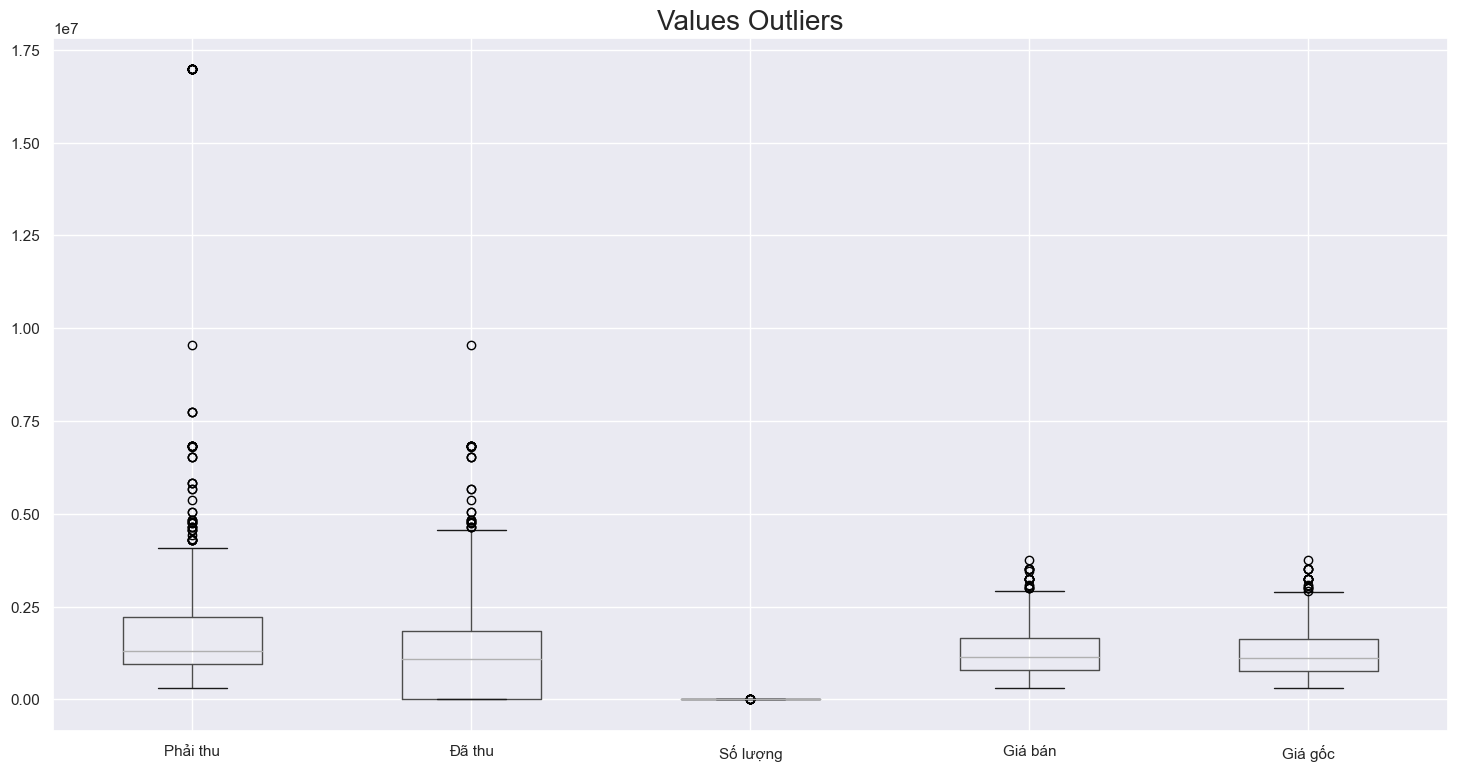

In [17]:
# Kiểm tra giá trị outliers bằng boxplot
num_cols = ['Phải thu','Đã thu','Số lượng','Giá bán','Giá gốc']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Values Outliers", fontsize=20)
plt.show()

In [18]:
# Sử dụng phương pháp IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Phải thu       1263000.0
Đã thu         1849000.0
Mã sản phẩm    1000010.0
Số lượng             0.0
Giá bán         869000.0
STT_1              157.0
Giá gốc         860000.0
dtype: float64


In [19]:
# thay đổi type 1 số column để có thể dùng phương pháp IQR
for column in df.columns:
    if df[column].dtype == 'datetime64[ns]':
        df[column] = df[column].astype('object')
        print(column)

Ngày tạo
Thời gian hẹn giao


In [20]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(754, 28)

In [21]:
# Sữa lại type một số columns đã đổi trước đó và một số column cần thiết khác
df['Mã sản phẩm'] = df['Mã sản phẩm'].astype('category').cat.as_ordered()
df['STT_1'] = df['STT_1'].astype('category').cat.as_ordered()
df['Ngày tạo'] = df['Ngày tạo'].astype('datetime64[ns]')
df['Thời gian hẹn giao'] = df['Thời gian hẹn giao'].astype('datetime64[ns]')

## 3.6) Visualize 1 số phân phối của biến số

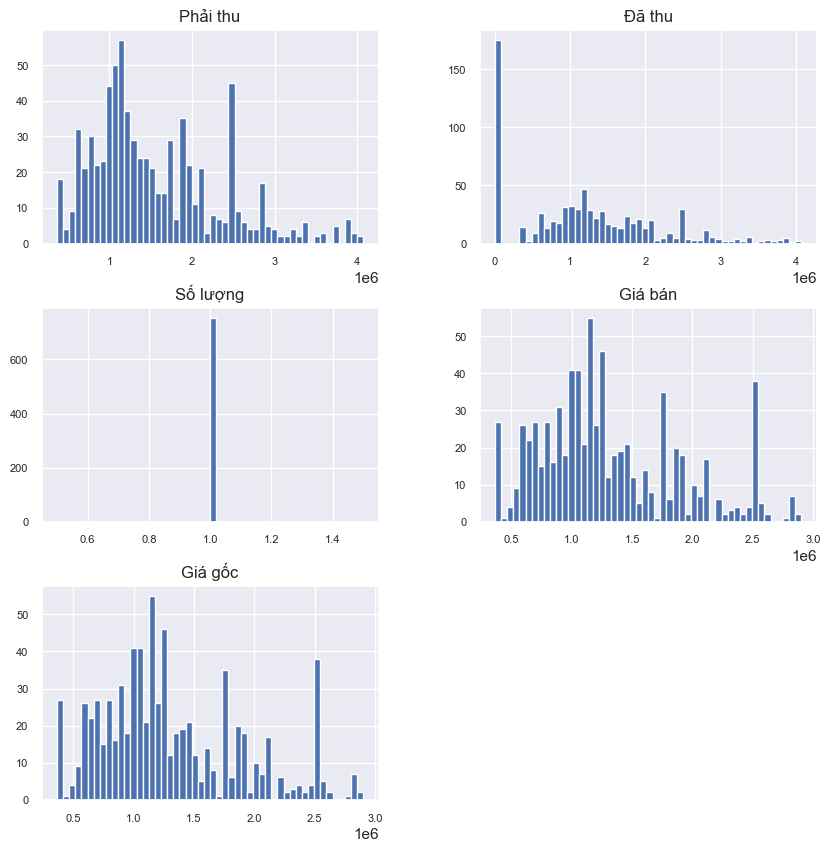

In [22]:
# Numerical data distribution (Phân phối dữ liệu số)
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8);

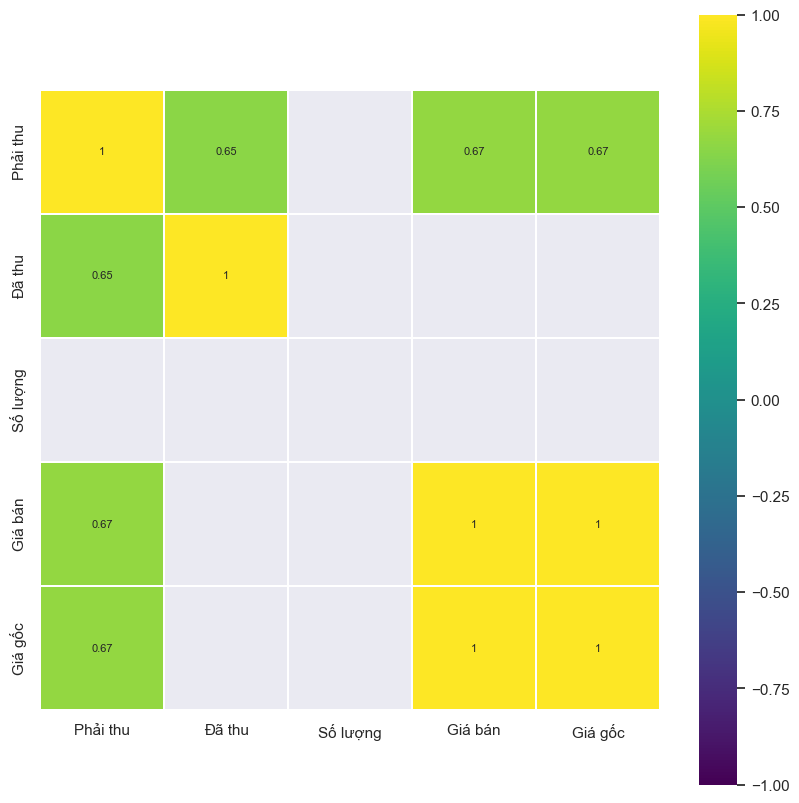

In [23]:
# Xem xét mối quan hệ giữa các biến số bằng biểu đồ HeatMap
corr = df.corr() # We already examined SalePrice correlations
plt.figure(figsize=(10, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## 3.7) Đặt ra một số câu hỏi tình huống để giải quyết vấn đề

In [24]:
# Xem 5 dòng đầu tiên của data
df.head(5)

Mã đơn hàng                     Hình thức xuất            Ngày tạo  \
0  00014SO22068748119  Xuất bán hàng Online tại siêu thị 2022-06-02 23:26:17   
1  10112SO22060011058         Xuất bán hàng tại siêu thị 2022-06-02 14:13:41   
2  10112SO22060011058         Xuất bán hàng tại siêu thị 2022-06-02 14:13:41   
3  10145SO22060012035         Xuất bán hàng tại siêu thị 2022-06-02 21:43:13   
4  10112SO22060011066         Xuất bán hàng tại siêu thị 2022-06-02 18:49:54   

       Tên khách hàng  Phải thu   Đã thu Trạng thái xuất Trạng thái giao hàng  \
0      Dương Nhựt Tân    796000   796000         Đã xuất              Đã giao   
1      Nguyễn Văn Hòa   2878000  2878000         Đã xuất              Đã giao   
2      Nguyễn Văn Hòa   2878000  2878000         Đã xuất              Đã giao   
3   NGUYỄN TRƯỜNG HẢI    909000   909000         Đã xuất              Đã giao   
4  Nguyễn Chiến Thắng   1903000  1903000         Đã xuất              Đã giao   

  Trạng thái hủy Hình thức thanh toán  ...  Giá bán        Nhóm hàng  \
0       Chưa hủy    Tiền mặt siêu thị  ...   796000   4965 - Giày nữ   
1       Chưa hủy    Tiền mặt siêu thị  ...  1903000   4965 - Giày nữ   
2       Chưa hủy    Tiền mặt siêu thị  ...   975000  4964 - Giày nam   
3       Chưa hủy    Tiền mặt siêu thị  ...   909000  4964 - Giày nam   
4       Chưa hủy    Tiền mặt siêu thị  ...  1903000   4965 - Giày nữ   

  Nhà sản xuất Trạng thái hồ sơ          Thời gian thu tiền STT_1  \
0       Reebok          1 - Mới  2022-06-05 11:17:25.253000     1   
1         Nike          1 - Mới  2022-06-02 14:14:03.805000     2   
2       ADIDAS          1 - Mới  2022-06-02 14:14:03.805000     3   
3         Erke          1 - Mới         2022-06-02 21:45:19     4   
4         Nike          1 - Mới  2022-06-02 19:22:47.025000     5   

  Onlineline/Cửa Hàng         Tỉnh  Nguồn Đặt Hàng  Giá gốc  
0              Online  Ho Chi Minh   Nhân Viên Tạo   796000  
1            Cửa Hàng  Ho Chi Minh   Nhân Viên Tạo  1903000  
2            Cửa Hàng  Ho Chi Minh   Nhân Viên Tạo   975000  
3            Cửa Hàng  Ho Chi Minh   Nhân Viên Tạo   909000  
4            Cửa Hàng  Ho Chi Minh   Nhân Viên Tạo  1903000  

[5 rows x 28 columns]

In [25]:
#Quetions 1: Người Tiêu dùng thích mua dày giép bằng hình thức online hay là đến tận cữa hàng ?

Q1 = df['Onlineline/Cửa Hàng'].value_counts()
print(Q1)
print("-----------------------------------------------------------------------------")
print("Số lượng người tiêu dùng mua hàng trực tiếp tại cửa hàng: ", Q1.values[0])
print("Số lượng người tiêu dùng mua hàng bằng hình thức Online: ", Q1.values[1])
print("-----------------------------------------------------------------------------")
colors = ['aqua','lightgreen']
label = Q1.index
size = Q1.values
trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors))
data = [trace]
layout = go.Layout(title='Phân Phối Hình Thức Mua Hàng Của Người Tiêu Dùng')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)  

Cửa Hàng    463
Online      291
Name: Onlineline/Cửa Hàng, dtype: int64
-----------------------------------------------------------------------------
Số lượng người tiêu dùng mua hàng trực tiếp tại cửa hàng:  463
Số lượng người tiêu dùng mua hàng bằng hình thức Online:  291
-----------------------------------------------------------------------------


Nike        230
ADIDAS      154
Reebok       89
SKECHERS     87
Puma         67
Erke         51
Anta         46
AKKA         21
PEAK          9
Name: Nhà sản xuất, dtype: int64
-----------------------------------------------------------------------------
Hãng sản xuất nào được ưu chuộng nhiều nhất:  Nike
Hãng sản xuất nào được ưu chuộng thấp nhất:  PEAK
-----------------------------------------------------------------------------


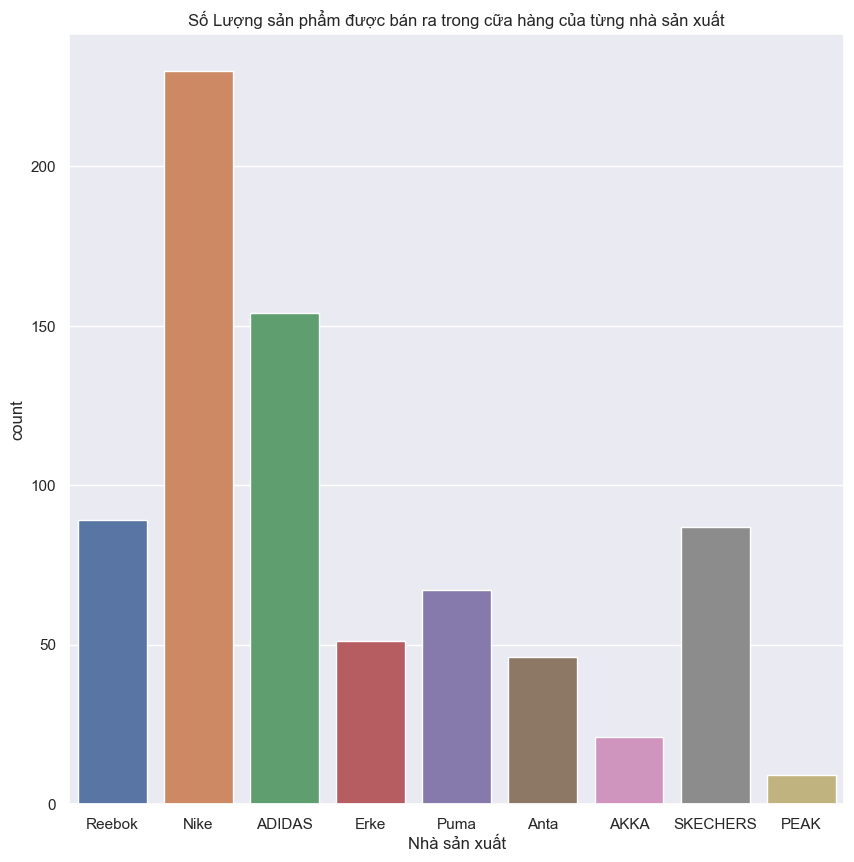

In [26]:
#Quetions 2: Những nhà sản xuất nào được khách hàng ưa chuộng nhất ?
Q2 = df['Nhà sản xuất'].value_counts()
print(Q2)
print("-----------------------------------------------------------------------------")
print("Hãng sản xuất nào được ưu chuộng nhiều nhất: ", Q2.index[0])
print("Hãng sản xuất nào được ưu chuộng thấp nhất: ", Q2.index[8])
print("-----------------------------------------------------------------------------")
plt.figure(figsize=(10,10))
sns.countplot(x='Nhà sản xuất', data=df)
plt.title("Số Lượng sản phẩm được bán ra trong cữa hàng của từng nhà sản xuất")
plt.show()

colors = ['aqua', 'lightgrey', 'lightgreen', '#D0F9B1', 'khaki', 'grey']
label = Q2.index[:5]
size = Q2.values[:5]
trace1 = go.Bar(x=label, 
               y=size, 
              marker=dict(
        color=colors,
        colorscale = "Jet"))
data = [trace1]
layout = go.Layout(title='Top 5 nhà sản xuất được ưu chuộng nhất tại cữa hàng')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [27]:
#Quetions 3: Nhóm hàng nào tại cửa hàng được bán ra nhiều nhất (Giày nam , Giày nữ , Giày Unisex, Dép Unisex)?
Q3 = df['Nhóm hàng'].value_counts()
print(Q3)
print("-----------------------------------------------------------------------------")
print("Nhóm hàng bán ra nhiều nhất: ", Q3.index[0])
print("Nhóm hàng bán ra ít nhất:", Q3.index[3])
print("-----------------------------------------------------------------------------")
colors = ['aqua','lightgreen']
label = Q3.index
size = Q3.values
trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors))
data = [trace]
layout = go.Layout(title='Phân phối nhóm hàng')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

4964 - Giày nam       413
4965 - Giày nữ        236
4966 - Giày unisex    102
4981 - Dép Unisex       3
Name: Nhóm hàng, dtype: int64
-----------------------------------------------------------------------------
Nhóm hàng bán ra nhiều nhất:  4964 - Giày nam
Nhóm hàng bán ra ít nhất: 4981 - Dép Unisex
-----------------------------------------------------------------------------


In [28]:
#Quetions 4: Thể hiện sự phân phối của Hình Thức Giao Hàng ?
lab1 = df["Hình thức giao hàng"].value_counts().keys().tolist()
val1 = df["Hình thức giao hàng"].value_counts().values.tolist()
trace = go.Pie(labels=lab1, 
                values=val1, 
                marker=dict(colors=['red']), 
                # Seting values to 
                hoverinfo="value"
              )
data = [trace]
layout = go.Layout(title="Phân Phối các hình thức giao hàng")
fig = go.Figure(data = data,layout = layout)
iplot(fig)

In [29]:
# Quetions 5: Cho biết sự tương quan giữa giá gốc và giá bán ra ?
ax= px.scatter(df,x= "Giá bán",y= "Giá gốc",marginal_x='histogram', marginal_y='histogram',size="Giá gốc", size_max=20,
              color= "Onlineline/Cửa Hàng",title="Tương quan giữa giá gốc và giá bán")
ax.show()

Ho Chi Minh    730
Binh Phuoc      23
Kien Giang       1
Name: Tỉnh, dtype: int64
TP.HCM - 730
Binh Phuoc - 23
Kien Giang - 1


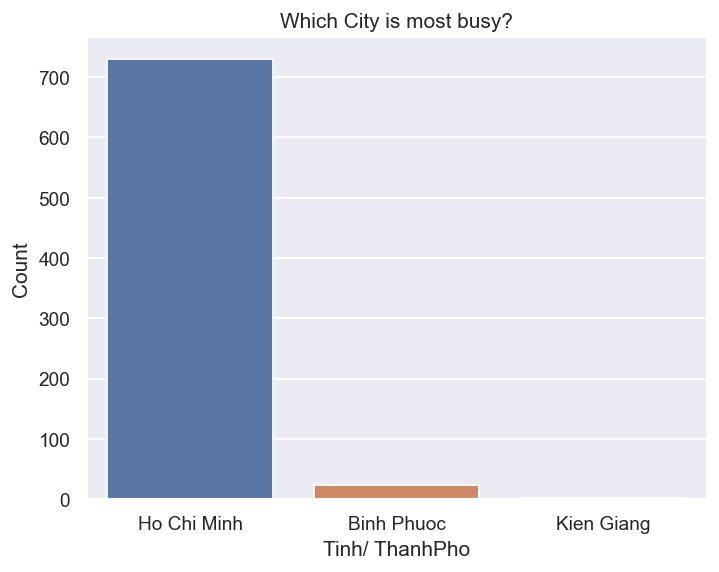

Nhận định: Doanh thu phần lớn là đến từ thành phố Hồ Chí Minh, đứng thứ 2 là Bình Phước,Doanh nghiệp nên cân nhắc có nên tiếp tục kinh doanh ở Kiên Giang hay không


In [30]:
# Quetions 6: Cho biết doanh thu của cữa hàng theo tỉnh/ thành phố? ?
print(df["Tỉnh"].value_counts())

plt.figure(dpi=125)
sns.countplot(x = 'Tỉnh',data = df)
plt.xlabel('Tinh/ ThanhPho')
plt.ylabel('Count')
plt.title('Which City is most busy?')
A,B,C = df["Tỉnh"].value_counts()

print('TP.HCM -',A)
print('Binh Phuoc -',B)
print('Kien Giang -',C)
plt.show()
print("Nhận định: Doanh thu phần lớn là đến từ thành phố Hồ Chí Minh, đứng thứ 2 là Bình Phước,Doanh nghiệp nên cân nhắc có nên tiếp tục kinh doanh ở Kiên Giang hay không")

               Phải thu     Đã thu  Số lượng    Giá bán    Giá gốc
Tỉnh                                                              
Binh Phuoc     40255000   25787000        23   29333000   29333000
Ho Chi Minh  1137502000  885223000       730  955035000  955035000
Kien Giang      1145000    1145000         1    1145000    1145000


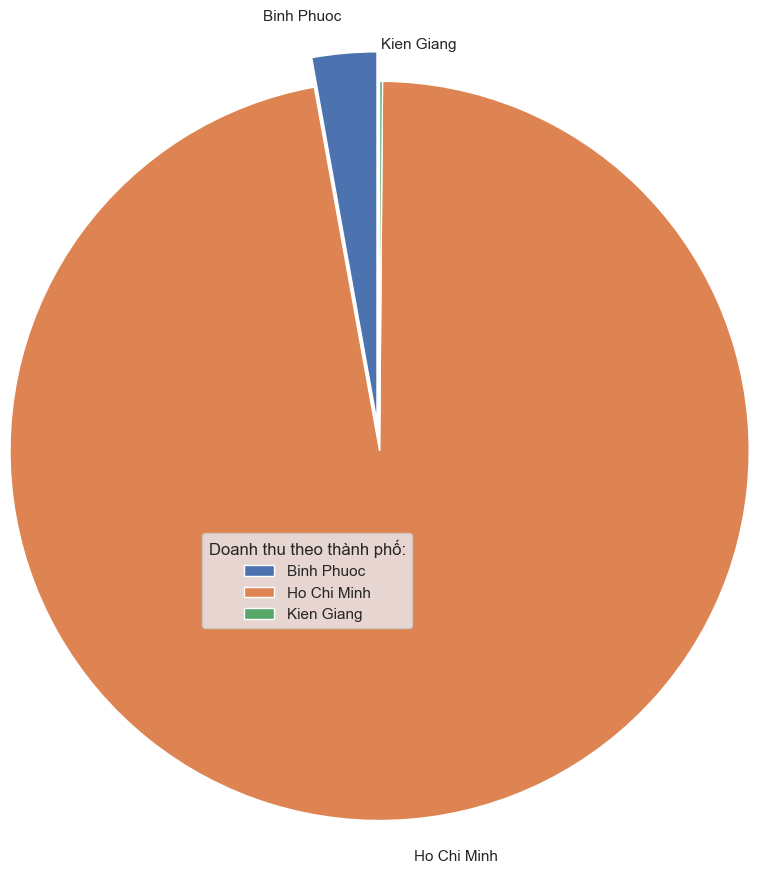

In [31]:
print(df.groupby(["Tỉnh"]).sum())
y = df.groupby(["Tỉnh"])["Đã thu"].sum()
mylabels = ["Binh Phuoc", "Ho Chi Minh", "Kien Giang"]
myexplode = [0.2, 0, 0]

plt.pie(y, labels = mylabels, startangle = 90, explode = myexplode, radius=2.5)
plt.legend(title = "Doanh thu theo thành phố:")
plt.show()

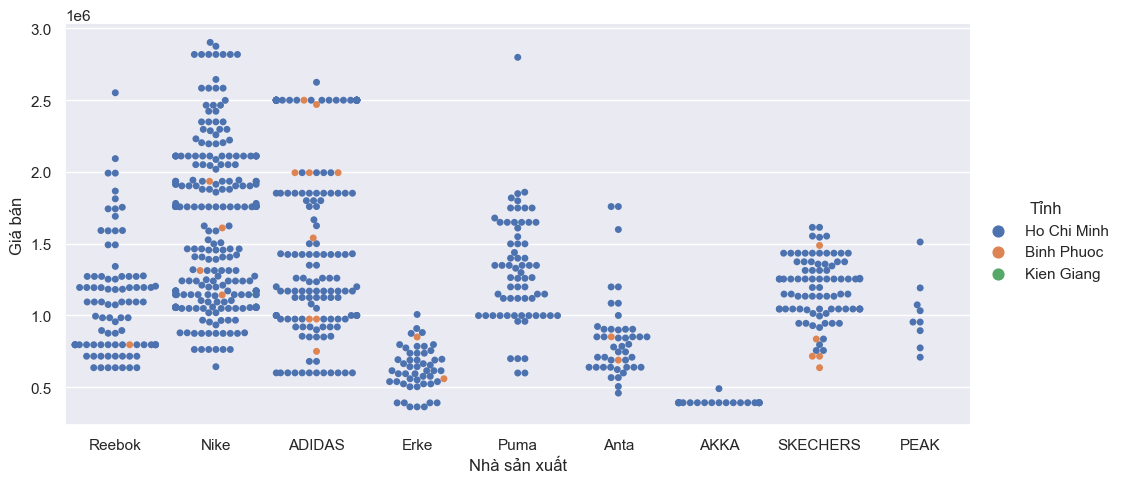

In [32]:
# Quetions 7: Phân tích độ ưa chuộng hãng giày/dép theo thành phố ?
sns.catplot(x='Nhà sản xuất',y='Giá bán',hue='Tỉnh',kind='swarm',data=df,aspect=2)
plt.xlabel('Nhà sản xuất')
plt.ylabel('Giá bán')
plt.show()

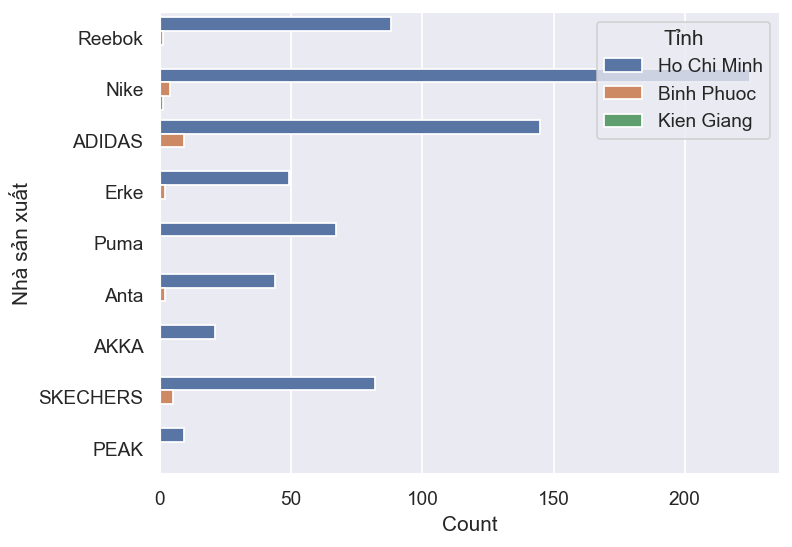

- Như ta thấy ở TPHCM khá ưu chuộng hãng Nike và ngược lại ở Bình Phước thì khá ưa chuộng ADIDAS


In [33]:
plt.figure(dpi=125)
sns.countplot(y ='Nhà sản xuất', hue = "Tỉnh", data = df) 
plt.xlabel('Count')
plt.ylabel('Nhà sản xuất')
plt.show()
print("- Như ta thấy ở TPHCM khá ưu chuộng hãng Nike và ngược lại ở Bình Phước thì khá ưa chuộng ADIDAS")

In [34]:
# Quetions 8: Cho biết 5 sản phẩm nào được bán chạy nhất cữa hàng ?
Q8 = df['Tên sản phẩm'].value_counts()
colors = ['aqua', 'lightgrey', 'lightgreen', '#D0F9B1', 'khaki', 'grey']
label = Q8.index[:5]
size = Q8.values[:5]
trace1 = go.Bar(x=label, 
               y=size, 
              marker=dict(
        color=colors,
        colorscale = "Jet"))
data = [trace1]
layout = go.Layout(title='Top 5 sản phẩm bán chạy nhất tại cữa hàng')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [35]:
# Quetions 9: Cho biết Doanh Thu của cữa hàng theo từng ngày dựa vào nhóm hàng đã được bán ra?

In [36]:
df['Dates'] = pd.to_datetime(df['Ngày tạo']).dt.date
df['Time'] = pd.to_datetime(df['Ngày tạo']).dt.time
df.head()

Mã đơn hàng                     Hình thức xuất            Ngày tạo  \
0  00014SO22068748119  Xuất bán hàng Online tại siêu thị 2022-06-02 23:26:17   
1  10112SO22060011058         Xuất bán hàng tại siêu thị 2022-06-02 14:13:41   
2  10112SO22060011058         Xuất bán hàng tại siêu thị 2022-06-02 14:13:41   
3  10145SO22060012035         Xuất bán hàng tại siêu thị 2022-06-02 21:43:13   
4  10112SO22060011066         Xuất bán hàng tại siêu thị 2022-06-02 18:49:54   

       Tên khách hàng  Phải thu   Đã thu Trạng thái xuất Trạng thái giao hàng  \
0      Dương Nhựt Tân    796000   796000         Đã xuất              Đã giao   
1      Nguyễn Văn Hòa   2878000  2878000         Đã xuất              Đã giao   
2      Nguyễn Văn Hòa   2878000  2878000         Đã xuất              Đã giao   
3   NGUYỄN TRƯỜNG HẢI    909000   909000         Đã xuất              Đã giao   
4  Nguyễn Chiến Thắng   1903000  1903000         Đã xuất              Đã giao   

  Trạng thái hủy Hình thức thanh toán  ... Nhà sản xuất Trạng thái hồ sơ  \
0       Chưa hủy    Tiền mặt siêu thị  ...       Reebok          1 - Mới   
1       Chưa hủy    Tiền mặt siêu thị  ...         Nike          1 - Mới   
2       Chưa hủy    Tiền mặt siêu thị  ...       ADIDAS          1 - Mới   
3       Chưa hủy    Tiền mặt siêu thị  ...         Erke          1 - Mới   
4       Chưa hủy    Tiền mặt siêu thị  ...         Nike          1 - Mới   

           Thời gian thu tiền STT_1 Onlineline/Cửa Hàng         Tỉnh  \
0  2022-06-05 11:17:25.253000     1              Online  Ho Chi Minh   
1  2022-06-02 14:14:03.805000     2            Cửa Hàng  Ho Chi Minh   
2  2022-06-02 14:14:03.805000     3            Cửa Hàng  Ho Chi Minh   
3         2022-06-02 21:45:19     4            Cửa Hàng  Ho Chi Minh   
4  2022-06-02 19:22:47.025000     5            Cửa Hàng  Ho Chi Minh   

  Nguồn Đặt Hàng  Giá gốc       Dates      Time  
0  Nhân Viên Tạo   796000  2022-06-02  23:26:17  
1  Nhân Viên Tạo  1903000  2022-06-02  14:13:41  
2  Nhân Viên Tạo   975000  2022-06-02  14:13:41  
3  Nhân Viên Tạo   909000  2022-06-02  21:43:13  
4  Nhân Viên Tạo  1903000  2022-06-02  18:49:54  

[5 rows x 30 columns]

In [37]:
df['Dates'] = pd.to_datetime(df['Ngày tạo']).dt.date
df['Time'] = pd.to_datetime(df['Ngày tạo']).dt.time

In [38]:
df.Dates.dtypes

dtype('O')

In [39]:
df['Dates'] = df['Dates'].astype('string')

In [40]:
df.Dates.value_counts()

2022-06-04    309
2022-06-03    272
2022-06-02    173
Name: Dates, dtype: Int64

In [41]:
a = df.loc[df['Dates'] == "2022-06-02"]
b = df.loc[df['Dates'] == "2022-06-03"]
c = df.loc[df['Dates'] == "2022-06-04"]


In [42]:
trace = go.Bar(
    x=a['Đã thu'].groupby(a['Nhóm hàng']).sum().index,
    y=a['Đã thu'].groupby(a['Nhóm hàng']).sum().values,
    name='course',
    marker=dict(
        color='red',
        colorscale = "Jet"))
data = [trace]
layout = go.Layout(
    title='Doanh Thu Theo Nhóm Hàng Ngày 2/6/2022', 
    yaxis = dict(title = 'Doanh Thu')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

trace1 = go.Bar(
    x=b['Đã thu'].groupby(b['Nhóm hàng']).sum().index,
    y=b['Đã thu'].groupby(b['Nhóm hàng']).sum().values,
    name='course',
    marker=dict(
        color='blue',
        colorscale = "Jet"))
data1 = [trace1]
layout1 = go.Layout(
    title='Doanh Thu Theo Nhóm Hàng Ngày 3/6/2022', 
    yaxis = dict(title = 'Doanh Thu')
)

fig1 = go.Figure(data=data1, layout=layout1)
py.iplot(fig1)


trace2 = go.Bar(
    x=c['Đã thu'].groupby(c['Nhóm hàng']).sum().index,
    y=c['Đã thu'].groupby(c['Nhóm hàng']).sum().values,
    name='course',
    marker=dict(
        color='green',
        colorscale = "Jet"))
data2 = [trace2]
layout2 = go.Layout(
    title='Doanh Thu Theo Nhóm Hàng Ngày 4/6/2022', 
    yaxis = dict(title = 'Doanh Thu')
)

fig2 = go.Figure(data=data2, layout=layout2)
py.iplot(fig2)

In [43]:
# Quetions 10: Cho biết siêu thị có doanh thu cao nhất trong 3 ngày ?
df.dtypes

Mã đơn hàng                     object
Hình thức xuất                  object
Ngày tạo                datetime64[ns]
Tên khách hàng                  object
Phải thu                         int64
Đã thu                           int64
Trạng thái xuất                 object
Trạng thái giao hàng            object
Trạng thái hủy                  object
Hình thức thanh toán            object
Hình thức giao hàng             object
Tạo từ                          object
Thời gian hẹn giao      datetime64[ns]
Ngày xuất hàng                  object
Siêu thị xuất                   object
Mã sản phẩm                   category
Tên sản phẩm                    object
Số lượng                         int64
Giá bán                          int64
Nhóm hàng                       object
Nhà sản xuất                    object
Trạng thái hồ sơ                object
Thời gian thu tiền              object
STT_1                         category
Onlineline/Cửa Hàng             object
Tỉnh                     

In [44]:
Q10 = df['Đã thu'].groupby(df['Siêu thị xuất']).sum().sort_values()

In [45]:
trace = go.Bar(
    x=Q10.index,
    y=Q10.values,
    name='course',
    marker=dict(
        color='green',
        colorscale = "Jet"))
data = [trace]
layout = go.Layout(
    title='Doanh Thu Theo ', 
    yaxis = dict(title = 'Siêu thị có doanh thu cao nhất trong 3 ngày')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# 4) Xây dựng dashboard

In [46]:
# Import thư viện cần thiêt
import dash 
import dash_bootstrap_components as dbc
from dash import dcc, html, callback
from dash.dependencies import Input, Output, State
from dash_bootstrap_templates import load_figure_template
from datetime import date
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

In [47]:
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.VAPOR,dbc.icons.BOOTSTRAP])
load_figure_template('VAPOR')

In [48]:
#Pie chart
colors = ['aqua','lightgreen']
label = df["Nhóm hàng"].value_counts().index
size = df["Nhóm hàng"].value_counts().values
trace = go.Pie(labels=label, 
               values=size,
               marker=dict(colors=colors))
data = [trace]
layout = go.Layout()
fig = go.Figure(data=data, layout=layout)

#Top 5 chart
colors = ['aqua', 'lightgrey', 'lightgreen', '#D0F9B1', 'khaki', 'grey']
Q2 = df['Nhà sản xuất'].value_counts()
label = Q2.index[:5]
size = Q2.values[:5]
trace1 = go.Bar(x=label, 
               y=size, 
              marker=dict(
        color=colors,
        colorscale = "Jet"))
data = [trace1]
fig1 = go.Figure(data=data, layout=layout)

#Doang Thu Chart
colors_dt = ['#ffa600', '#ff6361', '#bc5090','#58508d']
df['Dates'] = pd.to_datetime(df['Ngày tạo']).dt.date
df['Time'] = pd.to_datetime(df['Ngày tạo']).dt.time
df['Dates'] = df['Dates'].astype('string')
a = df.loc[df['Dates'] == "2022-06-02"]
b = df.loc[df['Dates'] == "2022-06-03"]
c = df.loc[df['Dates'] == "2022-06-04"]

trace = go.Bar(
    x=a['Đã thu'].groupby(a['Nhóm hàng']).sum().index,
    y=a['Đã thu'].groupby(a['Nhóm hàng']).sum().values,
    name='course',
    marker=dict(
        color=colors_dt,
        colorscale = "Jet"))
data = [trace]
layout = go.Layout(
    title='Doanh Thu Theo Nhóm Hàng Ngày 4/6/2022', 
    yaxis = dict(title = 'Doanh Thu (TRIỆU VND)')
)
fig_ngay2 = go.Figure(data=data,layout=layout)

trace1 = go.Bar(
    x=b['Đã thu'].groupby(b['Nhóm hàng']).sum().index,
    y=b['Đã thu'].groupby(b['Nhóm hàng']).sum().values,
    name='course',
    marker=dict(
        color=colors_dt,
        colorscale = "Jet"))
data1 = [trace1]
layout1 = go.Layout(
    title='Doanh Thu Theo Nhóm Hàng Ngày 3/6/2022', 
    yaxis = dict(title = 'Doanh Thu (TRIỆU VND)')
)
fig_ngay3 = go.Figure(data=data1, layout=layout1)

trace2 = go.Bar(
    x=c['Đã thu'].groupby(c['Nhóm hàng']).sum().index,
    y=c['Đã thu'].groupby(c['Nhóm hàng']).sum().values,
    name='course',
    marker=dict(
        color=colors_dt,
        colorscale = "Jet"))
data2 = [trace2]
layout2 = go.Layout(
    title='Doanh Thu Theo Nhóm Hàng Ngày 4/6/2022', 
    yaxis = dict(title = 'Doanh Thu (TRIỆU VND)')
)
fig_ngay4 = go.Figure(data=data2, layout=layout2)

#Doanh Thu Siêu Thị
colors_st = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600','#00876c','#6aaa96','#aecdc2','#f1f1f1','#f0b8b8','#e67f83','#d43d51']
Q10 = df['Đã thu'].groupby(df['Siêu thị xuất']).sum().sort_values()
trace3 = go.Bar(
    x=Q10.index,
    y=Q10.values,
    name='course',
    marker=dict(
        color= colors_st,
        colorscale = "Jet"))
data3 = [trace3]
layout = go.Layout(
    yaxis = dict(title = 'Doanh Thu (TRIỆU VNĐ)')
)
fig_sieuthi = go.Figure(data=data3, layout=layout)


In [49]:
app.layout = html.Div([
    #Header
    html.Div([
        html.H2("Doanh Số Bán Hàng Của Cửa Hàng AVA"),
        html.Img(src="/assets/stock-icon.png")
    ], className="banner"),
    
    #Body
    html.Div([
        html.Label(['Chọn Ngày:'],style = {'font-weight': 'bold','font-size': 25,'padding-top': '8px'}),
        dcc.Dropdown(
                id="dates",
                options = [
                    {'label': '02/06/2022', 'value': 1}, 
                    {'label': '03/06/2022', 'value': 2},
                    {'label': '04/06/2022', 'value': 3},
                ],
                value='02/06/2022',
                placeholder = "02/06/2022",
                multi=False,
                clearable=False,
            ),
        dcc.Graph(id='doanh_thu_chart'),
        html.Label(['Doanh Thu Các Siêu Thị Trong 3 ngày'],style = {'font-weight': 'bold','font-size': 25,'padding-top': '15px'}),
        dcc.Graph(id="sieuthi",figure = fig_sieuthi),
    ],className="rightcontainer"),
    html.Div([
        html.Label(['Tổng Quan Thông Tin Đơn Hàng:'],style = {'font-weight': 'bold','font-size': 25,'font-size': 25,'padding-top': '15px'}),
        html.Div([
            dcc.Dropdown(
                id='my_dropdown',
                options=[
                        {'label': 'Siêu thị xuất', 'value': 'Siêu thị xuất'}, 
                        {'label': 'Hình thức xuất', 'value': 'Hình thức xuất'},
                        {'label': 'Hình thức giao hàng', 'value': 'Hình thức giao hàng'},
                        {'label': 'Hình thức thanh toán', 'value': 'Hình thức thanh toán'},
                        {'label': 'Onlineline/Cửa Hàng', 'value': 'Onlineline/Cửa Hàng'},
                        {'label': 'Nguồn Đặt Hàng', 'value': 'Nguồn Đặt Hàng'},
                        {'label': 'Tỉnh', 'value': 'Tỉnh'},
                        {'label': 'Tạo từ', 'value': 'Tạo từ'},
                ],
                value='Siêu thị xuất',
                multi=False,
                clearable=False,
            ),
        ],style={"width": "35%"}),
        
        html.Div([
            dcc.Graph(id='the_graph')
        ],className="container"), 
        
        html.Div([
            html.Label(['Top 5 Nhà Sản Xuất Được Ưu Chuộng Nhất'],style = {'font-weight': 'bold','font-size': 25,'padding-top': '15px'}),
            dcc.Graph(id="2",figure= fig1)
        ],className="top5")
    ],className="six columns"),
])

#Callback
@app.callback(
    Output(component_id='doanh_thu_chart', component_property='figure'), 
    [Input(component_id='dates',component_property= 'value')]
)

def update_graph(dates):
    if dates == 3:
        return fig_ngay4
    elif dates == 2:
        return fig_ngay3
    else: 
        return fig_ngay2

@app.callback(
    Output(component_id='the_graph', component_property='figure'),
    [Input(component_id='my_dropdown', component_property='value')]
)

def update_graph(my_dropdown):
    dff = df

    piechart=px.pie(
            data_frame=dff,
            names=my_dropdown,
            )

    return (piechart)

In [50]:
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False) 

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
